In [2]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#Read data

df = pd.read_csv(r'C:\Users\vavit\OneDrive\Desktop\Data Sets\movies.csv', index_col = 0)

In [4]:
#Let's look at the data
df.head()

,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,,,,,,,,,,,,,,
The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [100]:
# What's the average score and the standard deviation?
df.score.mean()

6.390410958904109

In [102]:
df.score.std()

0.9688416402530576

In [5]:
# Any missing data?

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [7]:
# Column's data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [25]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearreleased
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,Apri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,Octo
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,Febr
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,Apri
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,0,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,Octo


In [27]:
pd.set_option('display.max_rows', None)

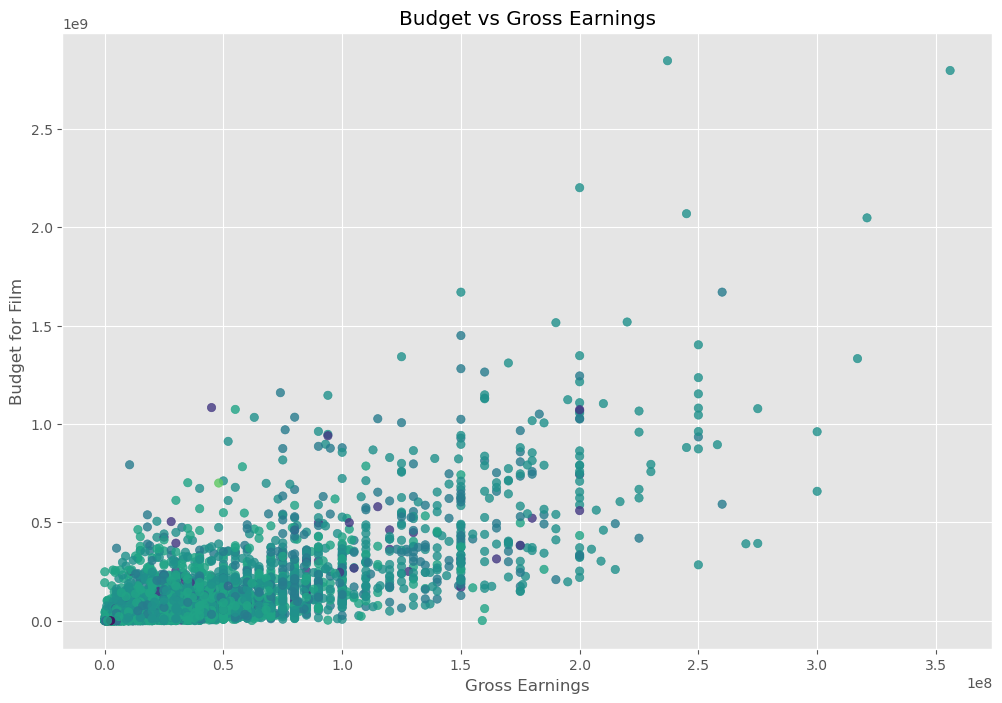

In [214]:
# Drop any duplicates
# df.drop_duplicates()
#dict = {'R':'red','PG':'green'}

col = ['red', 'green']

# Scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'], c = df['rating'], alpha = 0.8)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

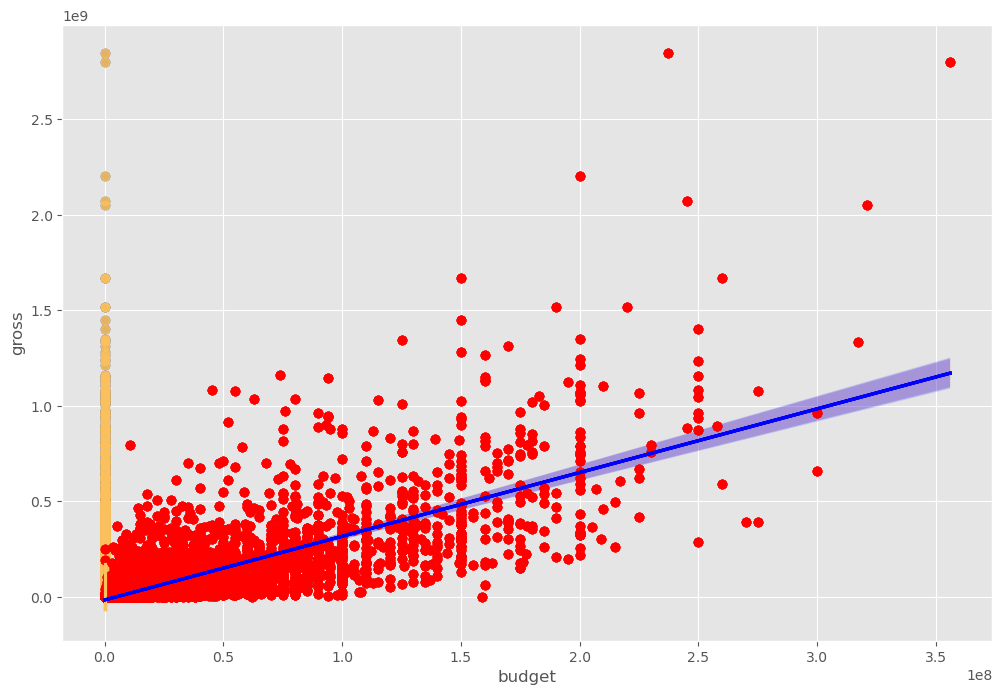

In [55]:
# Plot budget vs gross using seaborn
import seaborn as sns

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"}, ci=None, fit_reg=True)
plt.show()

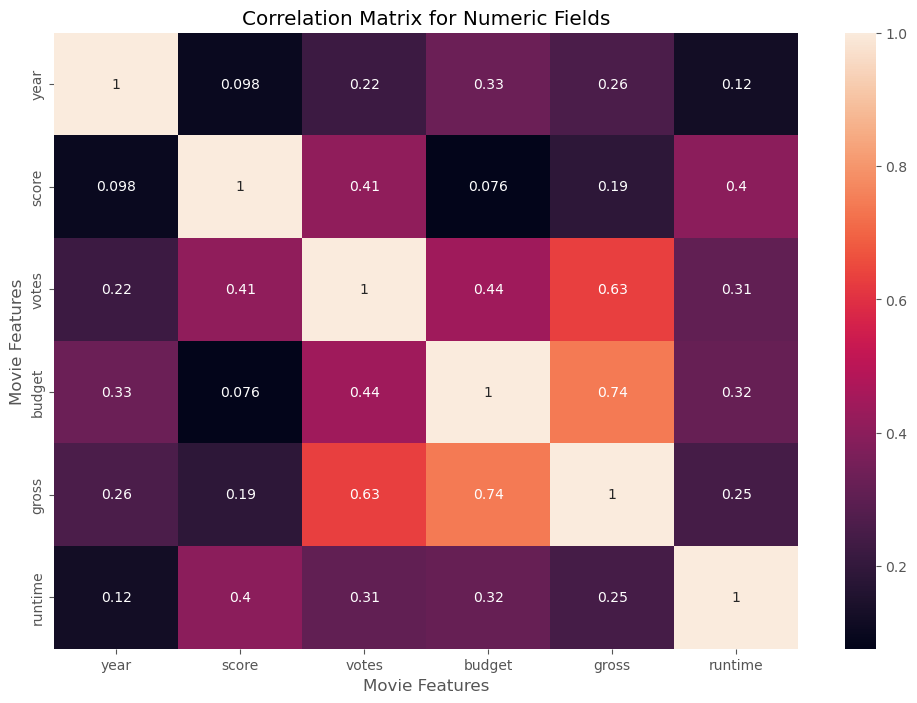

In [67]:
# Let's look at the correlation

numerical_df = df.select_dtypes(include=['number'])  # Select only numerical columns
correlation_matrix = numerical_df.corr(method = 'pearson') # Run the correlation
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Fields')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()


In [84]:
#Let's convert string columns to numerical to explore the correlation further
df_int = df

for col_name in df_int.columns:
    if(df_int[col_name].dtype == 'object'):
        df_int[col_name] = df_int[col_name].astype('category')
        df_int[col_name] = df_int[col_name].cat.codes

df_int.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


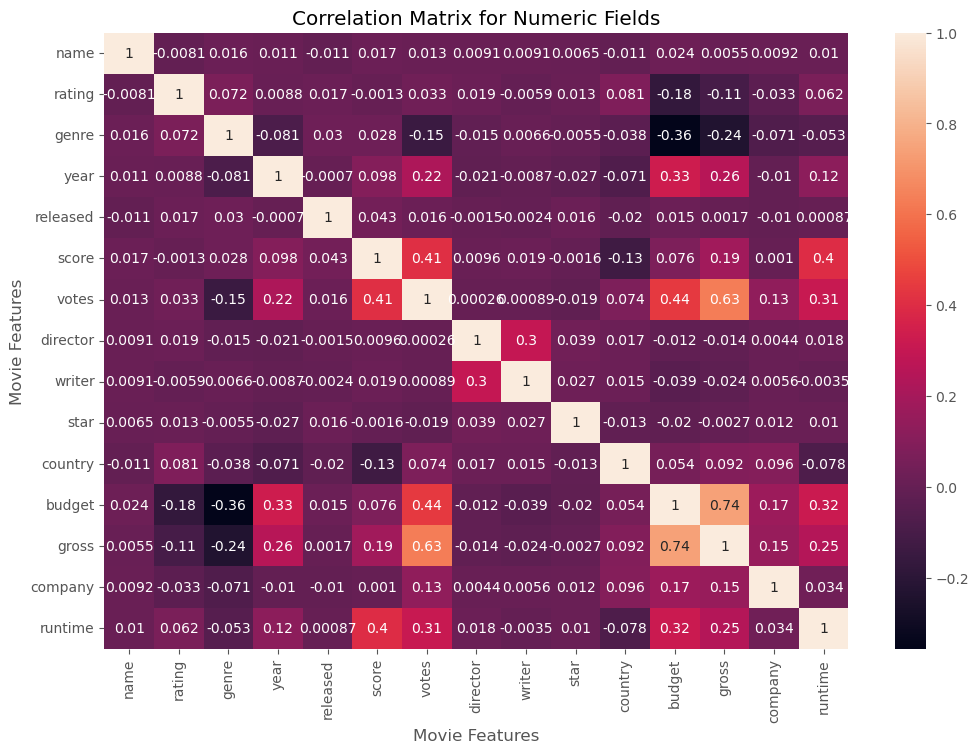

In [73]:
correlation_matrix = df_int.corr(method = 'pearson') 
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Fields')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [80]:
correlation_matrix = df_int.corr()
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values()

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64


In [126]:
numerical_df = df.select_dtypes(include=['number'])  # Select only numerical columns

for col in numerical_df.columns:
    average = np.mean(numerical_df[col].mean())
    print(col,round(average, 2))

name 3755.95
rating 5.14
genre 3.63
year 2000.41
released 1698.91
score 6.39
votes 88108.5
director 1516.12
writer 2292.1
star 1403.86
country 48.46
budget 35589876.19
gross 78500541.02
company 1419.52
runtime 107.26


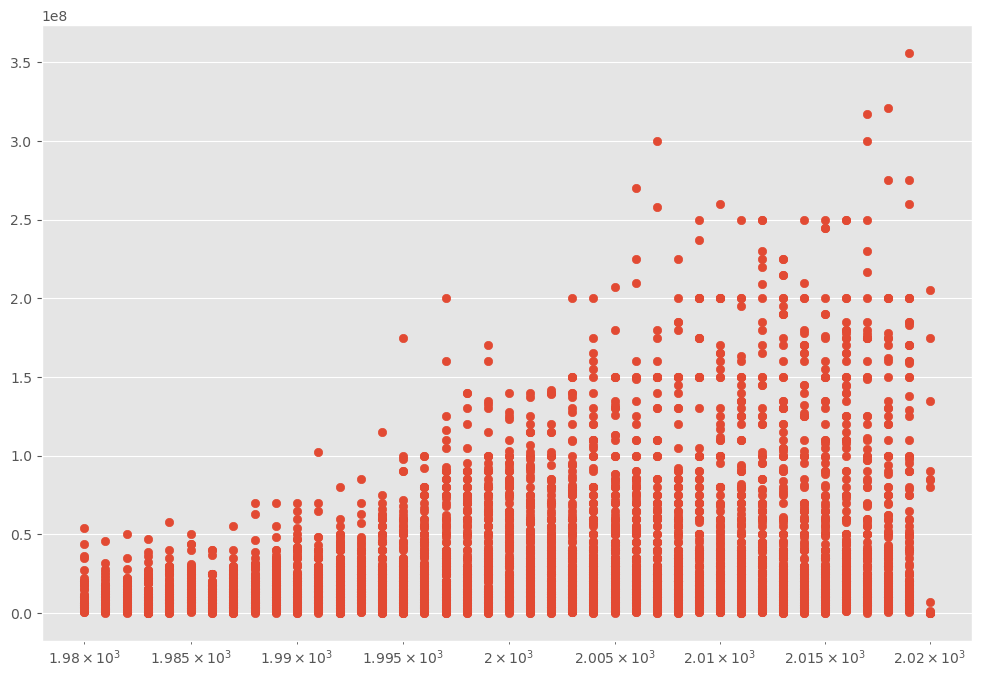

In [158]:
plt.scatter(df['year'], df['budget'])
plt.xscale('log')
plt.show()

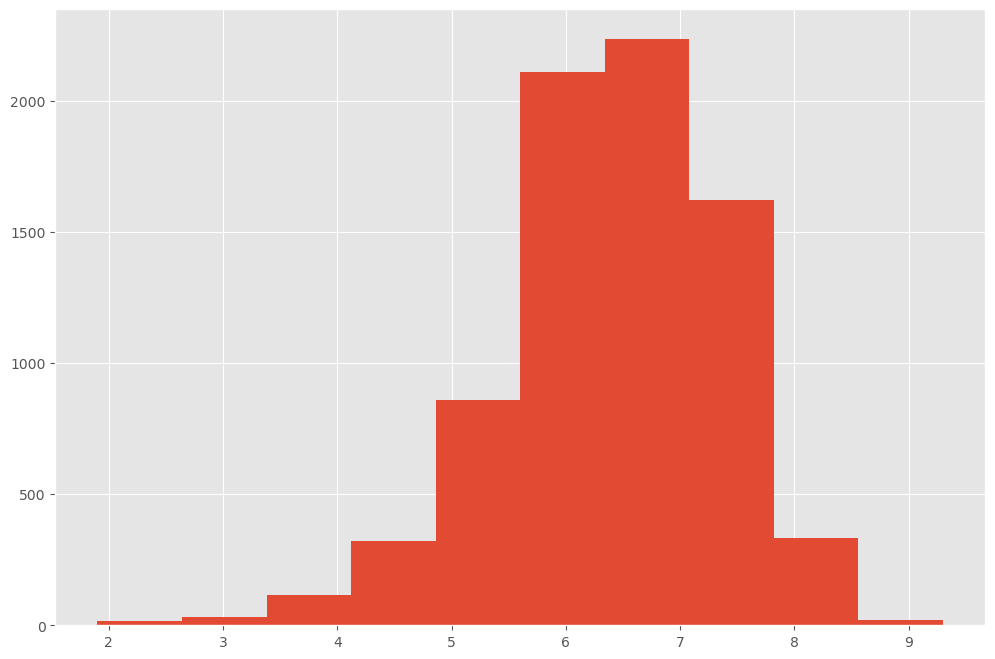

In [164]:
plt.hist(df['score'])

plt.title('Movie Score Histogram')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [192]:
values = list(set(df['rating']))

print(values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, -1]


In [194]:
output = []
for x in df.rating:
    if x not in output:
        output.append(x)
print(output)

[6, 4, 1, -1, 3, 2, 0, 9, 5, 10, 11, 8, 7]


In [ ]:
dict = {
    'R':'red',
    'PG':'green'
}

In [10]:
#Max score
max_rating = df['score'].max()
print(max_rating)

9.3


In [22]:
#What are the movies that have the highest score?
best_movies = df[df['score'] >= 9]
print(best_movies)

                         rating   genre  year  \
name                                            
The Shawshank Redemption      R   Drama  1994   
The Dark Knight           PG-13  Action  2008   

                                                  released  score      votes  \
name                                                                           
The Shawshank Redemption  October 14, 1994 (United States)    9.3  2400000.0   
The Dark Knight              July 18, 2008 (United States)    9.0  2400000.0   

                                   director          writer            star  \
name                                                                          
The Shawshank Redemption     Frank Darabont    Stephen King     Tim Robbins   
The Dark Knight           Christopher Nolan  Jonathan Nolan  Christian Bale   

                                country       budget         gross  \
name                                                                 
The Shawshank Redemption 